# Aprendiendo Machine Learning con Python 


## Regresión lineal 

Estadísticamente, regresión lineal es una aproximación para modelar la relación entre una variable dependiente `y` y una o mas variables `X`.

La regresión lineal es un algoritmo de aprendizaje supervisado, la idea es obtener automáticamente una “recta” que se busca con la tendencia de predicción de un conjunto de datos continuos. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor de salida real. El algoritmo deberá minimizar el coste de una función de error cuadrático y esos coeficientes corresponderán con la recta óptima.
___

Continuamos el uso de la librería Scikit Learn para este modelo. [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

**Ejercicio** - Predecir el precio de las casas de Windsor(Canadá), tomando como características el tamaño del lote y los cuartos.
[Fuente](https://vincentarelbundock.github.io/Rdatasets/articles/data.html)

Importemos las librerías con las que vamos a trabajar y el DataFrame con las que vamos a trabajar.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snssplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error #validar

df = pd.read_csv('../../ProyectoModelado_ElianaBonalde/datos/HousePrices/datos.csv')
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000,6360,2,1,1,yes,no,no,no,no,0,no


La tabla anterior tiene información sobre varias variables, sin embargo, nos vamos a enfocar en tres de ellas, a saber:

**Variables predictoras**

- lotsize - Tamaño del lote
- bedrooms - Número de cuartos

**Variable objetivo**
- price - Precio de la casa

___

Inicialmente, preparamos los datos a utilizar. 

In [120]:
df = df.iloc[:,[1,2,3]]
df

,price,lotsize,bedrooms
0,42000,5850,3
1,38500,4000,2
2,49500,3060,3
3,60500,6650,3
4,61000,6360,2
...,...,...,...
541,91500,4800,3
542,94000,6000,3
543,103000,6000,3
544,105000,6000,3


In [121]:
df.info() #tipo de variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   price     546 non-null    int64
 1   lotsize   546 non-null    int64
 2   bedrooms  546 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [122]:
df.isna().sum() #verificar si hay datos nulos

price       0
lotsize     0
bedrooms    0
dtype: int64

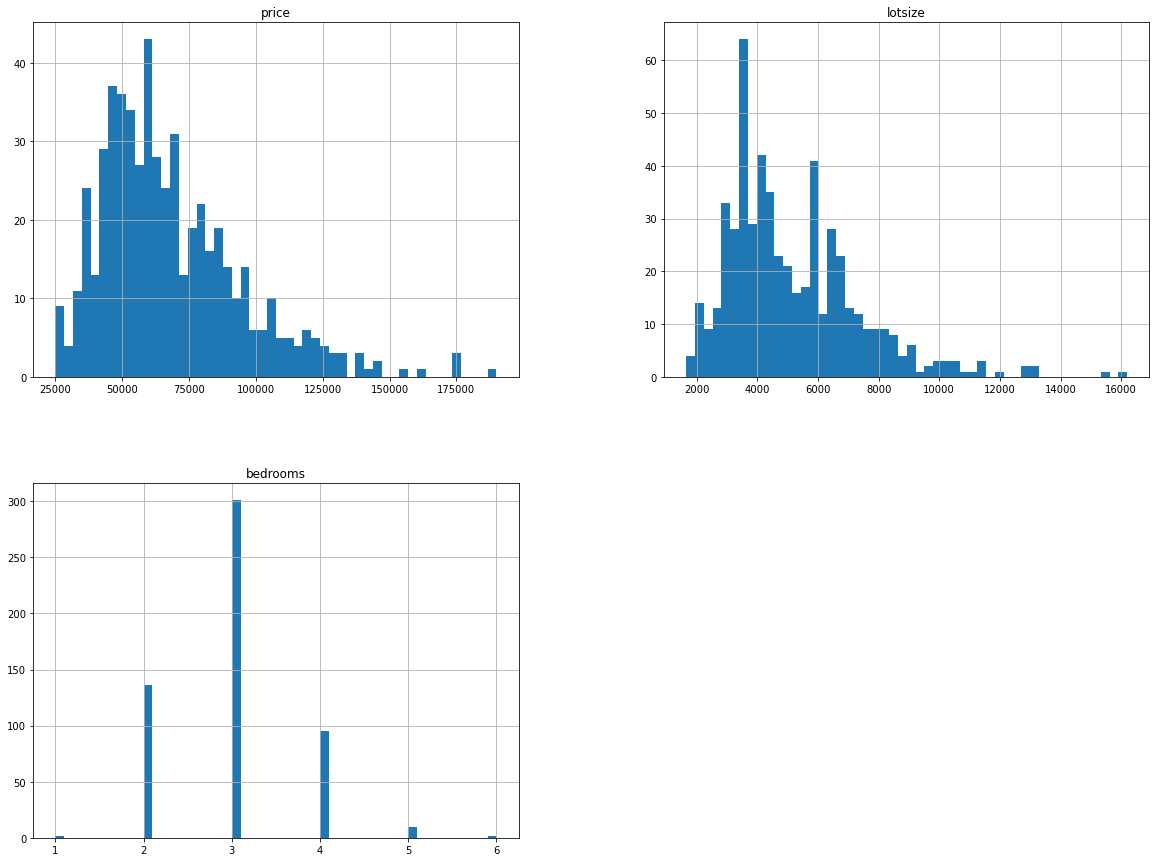

In [123]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [124]:
y = df.pop('price')
X = df
#print(X,y)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape, X_test.shape)

(436, 2) (110, 2)


In [126]:
mo_Li = LinearRegression() #no utiliza parámeros porque implementa el método de mínimos cuadrados
mo_Li.fit(X_train, y_train)

LinearRegression()

In [127]:
print(mo_Li.score(X_train, y_train))

0.38108400008288146


In [128]:
predic_Li = mo_Li.predict(X_test)
Li_df = pd.DataFrame(predic_Li)
Li_df.head(4)

,0
0,45632.836684
1,68531.027303
2,64568.751447
3,49534.154450


In [131]:
#print(mo_Li.score(y_test, predic_Li))

In [130]:
error = mean_absolute_error(
        y_true  = y_test,
        y_pred  = predic_Li,
        )
error

15595.178054854176